In [79]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as  plt

#import plotter
import seaborn as sns

%matplotlib inline

defenders = pd.read_csv(r'C:\Users\sosan\Documents\Dissertation\DataSets\Fifa 20\TransformedData\Defenders.csv')
midfielders = pd.read_csv(r'C:\Users\sosan\Documents\Dissertation\DataSets\Fifa 20\TransformedData\Midfielders.csv')
fowards = pd.read_csv(r'C:\Users\sosan\Documents\Dissertation\DataSets\Fifa 20\TransformedData\Strikers.csv')


In [ ]:
fowards.head(9)
#midfielders.describe()

In [ ]:
def Missing(data):
    """ Identify missing values in the dataframe
    :param data: set the font to be used for the labels, legend and axes
    """
    total = data.isnull().sum().sort_values(ascending = False)
    percent = round(data.isnull().sum().sort_values(ascending = False)/len(data)*100, 2)
    missing = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

    
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    plt.figure(figsize = (10,5));
    sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = cmap)
    plt.savefig('missingValues.png')
    return(missing) 

#plots number of dataframes side by side
def SideSide(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw = True)

In [80]:
missing_Defender_Data = Missing(midfielders)
missing_Defender_Data
#missing_Defender_Data.to_csv(r'C:\Users\sosan\Documents\Dissertation\DataSets\Fifa 20\TransformedData\MissingDataResult.csv', index = True)

NameError: name 'Missing' is not defined

In [81]:
def convertFoot(playerData):
    playerData.loc[playerData['foot'] == 'Right', 'foot'] = 1
    playerData.loc[playerData['foot'] == 'Left', 'foot'] = 0
    return playerData

def convertDefenceLabels(data):
    data.loc[data['BP'] == 'CB', 'BP'] = 0
    data.loc[(data['BP'] == 'LB') | (data['BP'] == 'LWB'), 'BP'] = 1
    data.loc[(data['BP'] == 'RB') | (data['BP'] == 'RWB'), 'BP'] = 2
    return data

def convertFowardLabels(data):
    data.loc[data['BP'] == 'LW', 'BP'] = 0
    data.loc[data['BP'] == 'RW', 'BP'] = 1
    data.loc[(data['BP'] == 'ST') | (data['BP'] == 'CF'), 'BP'] = 2
    return data

def convertMidfieldLabels(data):
    data.loc[data['BP'] == 'CM', 'BP'] = 1
    data.loc[data['BP'] == 'CDM', 'BP'] = 0
    data.loc[data['BP'] == 'CAM', 'BP'] = 2
    data.loc[data['BP'] == 'RM' , 'BP'] = 4
    data.loc[data['BP'] == 'LM', 'BP'] = 3
    return data

In [82]:
#get a list of the numeric features in the dataset
defenders = convertDefenceLabels(defenders)
defenders = convertFoot(defenders)
midfielders = convertMidfieldLabels(midfielders)
midfielders = convertFoot(midfielders)
fowards = convertFowardLabels(fowards)
fowards = convertFoot(fowards)
fowards.head(5)


,Name,Image,Country,Position,Age,Overall,Potential,Club,ID,Height,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.org/players/4/20/20801.png,Portugal,"ST,LW",34,93,93,Juventus,20801,188.0,...,High,Low,5,90,93,82,89,35,78,448
1,Mohamed Salah,https://cdn.sofifa.org/players/4/20/209331.png,Egypt,"RW,ST",27,90,90,Liverpool,209331,175.3,...,High,Medium,3,93,86,81,89,45,74,377
2,Kylian Mbappé,https://cdn.sofifa.org/players/4/20/231747.png,France,"ST,RW",20,89,89,Paris Saint-Germain,231747,177.8,...,High,Low,3,96,84,78,90,39,75,812
3,Harry Kane,https://cdn.sofifa.org/players/4/20/202126.png,England,ST,25,89,89,Tottenham Hotspur,202126,188.0,...,High,High,3,70,91,79,81,47,83,383
4,Robert Lewandowski,https://cdn.sofifa.org/players/4/20/188545.png,Poland,ST,30,89,89,FC Bayern München,188545,182.9,...,High,Medium,4,77,87,74,85,41,82,359


In [83]:

indexes = defenders._get_numeric_data().columns
print(indexes)

Index(['Age', 'Overall', 'Potential', 'ID', 'Height', 'Weight', 'BOV',
       'Growth', 'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'W/F', 'SM', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY'],
      dtype='object')


In [84]:
player_features = ['Age', 'Overall', 'Potential', 'Height', 'Weight', 'BOV', 'Growth',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF',
       'PHY']
defenders[player_features]

,Age,Overall,Potential,Height,Weight,BOV,Growth,Value,Wage,Release Clause,...,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY
0,27,90,90,193.0,92.3,90,1,78000000.0,20000000.0,150200000.0,...,454,3,2,3,77,60,70,71,90,86
1,28,89,89,188.0,89.1,89,2,67500000.0,15000000.0,119800000.0,...,396,3,2,3,71,28,54,67,89,87
2,33,89,89,182.9,82.3,90,0,31500000.0,30000000.0,64600000.0,...,460,3,3,4,72,68,75,73,87,85
3,34,89,89,188.0,85.0,89,0,24500000.0,21500000.0,40400000.0,...,404,3,2,4,68,46,58,60,90,82
4,33,88,88,188.0,78.2,89,0,28000000.0,13500000.0,47600000.0,...,405,3,2,3,60,48,64,61,89,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6149,18,48,48,185.4,74.1,51,6,40000000.0,100000.0,70000000.0,...,285,2,2,1,59,35,47,47,45,52
6150,26,48,48,182.9,78.2,52,3,40000000.0,200000.0,143000000.0,...,290,3,2,1,60,32,51,45,47,55
6151,18,48,48,177.8,69.1,49,13,50000000.0,100000.0,114000000.0,...,256,2,2,1,56,26,29,48,47,50
6152,16,47,47,177.8,71.4,47,17,50000000.0,100000.0,119000000.0,...,259,3,2,1,65,26,32,45,43,48


In [85]:
#defenders = defenders[(defenders['BP'] != 'CB')]
defenders = defenders[['Age','BP', 'Overall','foot', 'Potential', 'Height', 'Weight', 'BOV',
       'Growth', 'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'W/F', 'SM', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY']]
midfielders = midfielders[['Age','BP', 'Overall','foot', 'Potential', 'Height', 'Weight', 'BOV',
       'Growth', 'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'W/F', 'SM', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY']]
fowards = fowards[['Age','BP', 'Overall','foot', 'Potential', 'Height', 'Weight', 'BOV',
       'Growth', 'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'W/F', 'SM', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY']]



In [86]:
def normalizeData(data):
    min_max = MinMaxScaler()
    data[player_features] =  min_max.fit_transform(data[player_features])
    #df_scaled = pd.DataFrame(player, columns=numerical_Data.columns,index=numerical_Data.index)
    return data
    
def showCorrelation(data):
    DataFrame_Correlation_matrix = data.corr()
    print(DataFrame_Correlation_matrix['Overall'].sort_values(ascending=False))

In [87]:
defenders = normalizeData(defenders)
midfielders = normalizeData(midfielders)
fowards = normalizeData(fowards)

In [ ]:
fowards.head(5)

In [88]:
#defenders variables
dictionaryOf_x_y = {}
 
predictorFeatures = defenders.columns.drop(['Overall', 'BP'])
defenders['foot'] = defenders['foot'].astype(int)
dictionaryOf_x_y['defenders'] = {'x_variable': defenders[predictorFeatures] , 'y_variable' : defenders.BP.astype(int)}
dictionaryOf_x_y['midfielders'] = {'x_variable': midfielders[predictorFeatures] , 'y_variable' : midfielders.BP.astype(int)}
dictionaryOf_x_y['fowards'] = {'x_variable': fowards[predictorFeatures] , 'y_variable' : fowards.BP.astype(int)}
dictionaryOf_x_y['midfielders']['y_variable'].iloc[:5]

0    2
1    2
2    2
3    2
4    1
Name: BP, dtype: int32

In [ ]:
y_target, x_neighbours = fowards.iloc[0, :], fowards
x_neighbours

In [ ]:
dictionaryOf_x_y['defenders']['y_variable']

In [ ]:
y_variable = y_variable.astype(int)
y_variable

In [89]:
from sklearn.model_selection import train_test_split
dictionaryOfTrain_Test = {}
x_train, x_test, y_train, y_test = train_test_split(dictionaryOf_x_y['defenders']['x_variable'], dictionaryOf_x_y['defenders']['y_variable'], test_size=0.2)
dictionaryOfTrain_Test['defenders'] = {'x_train': x_train,  'x_test' : x_test, 'y_train':y_train, 'y_test': y_test, 'classes' : ['Center Back','Left Wing-Back', 'Right Wing-Back']}

x_train, x_test, y_train, y_test = train_test_split(dictionaryOf_x_y['midfielders']['x_variable'], dictionaryOf_x_y['midfielders']['y_variable'], test_size=0.2)
dictionaryOfTrain_Test['midfielders'] = {'x_train': x_train,  'x_test' : x_test, 'y_train' : y_train, 'y_test': y_test, 'classes' : ['CDM','CM','CAM','LM', 'RM' ]}

x_train, x_test, y_train, y_test = train_test_split(dictionaryOf_x_y['fowards']['x_variable'], dictionaryOf_x_y['fowards']['y_variable'], test_size=0.2)
dictionaryOfTrain_Test['fowards'] = {'x_train': x_train,  'x_test' : x_test, 'y_train' : y_train, 'y_test': y_test, 'classes' : ['Left Winger','Right winger','Striker' ]}

print (dictionaryOfTrain_Test['defenders']['x_train'].shape, dictionaryOfTrain_Test['defenders']['y_train'].shape)
print (dictionaryOfTrain_Test['defenders']['x_test'].shape, dictionaryOfTrain_Test['defenders']['y_test'].shape)

(4923, 62) (4923,)
(1231, 62) (1231,)


In [90]:
dictionaryOfTrain_Test['defenders']['x_train']

,Age,foot,Potential,Height,Weight,BOV,Growth,Value,Wage,Release Clause,...,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY
5011,0.32,1,0.325581,0.498906,0.354086,0.348837,0.16,0.306982,0.000000,0.473420,...,0.511029,0.50,0.0,0.000000,0.591549,0.435484,0.583333,0.590164,0.346939,0.428571
169,0.40,0,0.744186,0.555799,0.513619,0.767442,0.08,0.012834,0.267559,0.025075,...,0.834559,0.50,0.5,0.333333,0.690141,0.693548,0.850000,0.852459,0.755102,0.693878
2154,0.52,1,0.511628,0.444201,0.548638,0.534884,0.00,0.897331,0.013378,0.000401,...,0.724265,0.50,0.0,0.000000,0.746479,0.677419,0.566667,0.622951,0.510204,0.897959
4336,0.12,1,0.372093,0.610503,0.566148,0.395349,0.64,0.743326,0.000000,0.001204,...,0.617647,0.50,0.0,0.000000,0.873239,0.516129,0.500000,0.655738,0.367347,0.510204
2859,0.32,1,0.465116,0.498906,0.416342,0.488372,0.16,0.897331,0.010033,0.000301,...,0.573529,0.50,0.0,0.000000,0.774648,0.387097,0.566667,0.622951,0.448980,0.448980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,0.08,0,0.209302,0.667396,0.468872,0.232558,0.48,0.142710,0.000000,0.272818,...,0.290441,0.25,0.0,0.000000,0.535211,0.177419,0.150000,0.377049,0.285714,0.469388
819,0.32,1,0.604651,0.667396,0.513619,0.627907,0.16,0.004620,0.070234,0.009930,...,0.812500,0.50,0.5,0.000000,0.704225,0.838710,0.683333,0.704918,0.571429,0.938776
5025,0.12,0,0.302326,0.667396,0.433852,0.302326,0.52,0.358316,0.000000,0.692076,...,0.411765,0.50,0.0,0.000000,0.704225,0.225806,0.433333,0.491803,0.346939,0.285714
1545,0.48,0,0.534884,0.667396,0.725681,0.558140,0.00,0.000616,0.013378,0.001304,...,0.584559,0.50,0.0,0.333333,0.535211,0.435484,0.583333,0.540984,0.530612,0.795918


In [ ]:
x_train

In [ ]:
from sklearn.metrics import *

#Learning curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import r2_score, mean_squared_error

# Import Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.inspection import permutation_importance
import eli5
from eli5.sklearn import PermutationImportance

# Import NearestNeighbour
import numpy as np
from sklearn.neighbors import NearestNeighbors

def Apply_model(model, x_data, y_true, cv_folds = 10):

    y_pred = model.predict(x_data)

    Accuracy = round(np.median(cross_val_score(model, x_data, y_true, cv = cv_folds)),2)*100
    
    Error   = 1 - Accuracy
    
    precision = precision_score(y_true, y_pred, average='micro') * 100
    
    recall = recall_score(y_true, y_pred, average = 'micro') * 100
    
    f1score = f1_score(y_true, y_pred, average = 'micro') * 100

    print('Model Name: ',type(model) )
    #print("score = ", RF_Model.score(x_train, y_train), "\n")

    print('Scoring Accuracy: %.2f %%'%(Accuracy))
    print("Precision: %.2f %%"%(precision))
    print("Recall: %.2f %%"%(recall))
    print('f1-score: %.2f %%'%(f1score))
    return y_pred

def Confuse(y, y_pred, data_classes):

    training_con_matrix = confusion_matrix(y, y_pred)
    print(training_con_matrix)

    cnf_matrix = confusion_matrix(y, y_pred)
    
    cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis = 1)[:, np.newaxis]
    c_train = pd.DataFrame(cnf_matrix * 100, index = data_classes, columns = data_classes)

    cmap = sns.diverging_palette( 250 , 15 , as_cmap = True )

    ax = sns.heatmap(c_train, annot = True, cmap = cmap, square = True, cbar = False, 
                          fmt = '.2f', annot_kws = {"size": 15})
    return(ax, c_train)

def permuteFeatureImportance(model, x_test, y_test):
    
    perm = PermutationImportance(model, random_state=1).fit(x_test, y_test)
    eli5.show_weights(perm, feature_names = x_test.columns.tolist())
    #results = permutation_importance(model, x_test, y_test, scoring='neg_mean_squared_error')

    # get importance
    #importance = results.importances_mean.argsort()

    #print(importance)

    # for i,v in enumerate(importance):
    #     print('Feature: %0d, Score: %.5f' % (i,v))

    # indices = np.argsort(important_feat)[-20:]  # top 15 features

    # print(indices)

    #plt.title('Feature Importances')
    #plt.barh(range(len(indices)), important_feat[indices], color='b', align='center')
    #plt.yticks(range(len(indices)), [predictorFeatures[i] for i in indices])
    #plt.xlabel('Relative Importance')

def findNearestNeightbour(x, y, algorithm):
    nn = NearestNeighbors(5, algorithm= algorithm)
    nn.fit(x)
    print(nn)
    dist, indc = nn.kneighbors(y, 5)
    print(dist[0:10], indc[0:10])

In [ ]:
y_target = np.array(y_target).reshape(1, -1)
algorithms = ['brute', 'ball_tree', 'kd_tree']

for algo in algorithms:
    findNearestNeightbour(x_neighbours, y_target, algo)

In [ ]:
x_neighbours.iloc[8, :]

In [ ]:

#Create a list of models to train the data sets including:
# Random Forest, SGDClassifier and MLPClassifier
modelList = [RandomForestClassifier(max_features = 'sqrt', max_leaf_nodes = 10), SGDClassifier(max_iter = 200, tol = None), MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(32, 24, 12, 6), random_state=1)]

#create an array of all the position categories
positions = ['defenders','midfielders', 'fowards']

#Loop through the lust of categories in the dictionary of training and test data
for key,value in dictionaryOfTrain_Test.items():
    # print the current key in the dictionary which is the current position (i.e defenders midifelders or forwards)
    print('for the ',key)
    loop = 0
    for model in modelList:
        model.fit(value['x_train'], value['y_train'])
        y_train_pred = Apply_model(model, value['x_train'], value['y_train'])
        print(value['classes'])
        plt.figure()
        if loop == 0:
            pltname = key + 'RF'
        elif loop == 1:
            pltname = key + 'SGD'
        elif loop == 2:
            pltname= key + "MLP"        
        loop = loop + 1
        Confuse(value['y_train'], y_train_pred, value['classes'])
        plt.savefig(pltname)
        permuteFeatureImportance(model, value['x_train'], value['y_train'])


In [ ]:
#sample the modified RF model for increased number of trees in the forest
newModelList = [RandomForestClassifier(n_estimators = 200,max_features = 'sqrt', max_leaf_nodes = 10)]

positions = ['midfielders']
for key,value in dictionaryOfTrain_Test.items():
    print('for the ',key)
    while key == 'midfielders':
        loop = 0
        for model in newModelList:
            model.fit(value['x_train'], value['y_train'])
            y_train_pred = Apply_model(model, value['x_train'], value['y_train'])
            print(value['classes'])
            plt.figure()
            Confuse(value['y_train'], y_train_pred, value['classes'])
            permuteFeatureImportance(model, value['x_train'], value['y_train'])

In [ ]:
permuteFeatureImportance(newModelList[0], dictionaryOfTrain_Test['midfielders']['x_train'], dictionaryOfTrain_Test['midfielders']['y_train'])

In [ ]:
for key,value in dictionaryOfTrain_Test.items():
    print('for the ',key)
    for model in modelList:
        model.fit(value['x_train'], value['y_train'])
        y_train_pred = Apply_model(model, value['x_test'], value['y_test'])
        print(value['classes'])
        plt.figure()
        Confuse(value['y_test'], y_train_pred, value['classes'])


In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pcad_data = pca.fit_transform(x_variable)
#percentage variation on each principal component
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

#create lables for eachb principal component
labels = ['PC' + str(pc) for pc in range(1, len(per_var)+1)]



In [ ]:
import matplotlib.pyplot as  plt
%matplotlib inline
plt.bar(x = range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of explained variables')
plt.xlabel('Principal Component')
plt.title('Screen Plot')


In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.inspection import permutation_importance

rf_reg_model = RandomForestRegressor(random_state=1, max_depth=10)

rf_reg_model.fit(dictionaryOfTrain_Test['midfielders']['x_train'], dictionaryOfTrain_Test['midfielders']['y_train'])
		
important_feat = rf_reg_model.feature_importances_
		
# perform permutation importance
		
results = permutation_importance(rf_reg_model, dictionaryOfTrain_Test['midfielders']['x_train'], dictionaryOfTrain_Test['midfielders']['y_train'], scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean.argsort()

print(importance)

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
	print(predictorFeatures[i])
			
indices = np.argsort(important_feat)[-15:]  # top 15 features


[55 53  5  3 54  8 48 46  0 49  2 52 47 50  6 45 27  4 26 51 58 28  7 39
 21 29 13 30  9 19 32 40 34 42 25 15 18 16 44 57 10 61 35 22 17 23 20 43
 31 59 33 37 24 14  1 41 12 36 38 11 56 60]
Feature: 0, Score: 55.00000
Age
Feature: 1, Score: 53.00000
foot
Feature: 2, Score: 5.00000
Potential
Feature: 3, Score: 3.00000
Height
Feature: 4, Score: 54.00000
Weight
Feature: 5, Score: 8.00000
BOV
Feature: 6, Score: 48.00000
Growth
Feature: 7, Score: 46.00000
Value
Feature: 8, Score: 0.00000
Wage
Feature: 9, Score: 49.00000
Release Clause
Feature: 10, Score: 2.00000
Attacking
Feature: 11, Score: 52.00000
Crossing
Feature: 12, Score: 47.00000
Finishing
Feature: 13, Score: 50.00000
Heading Accuracy
Feature: 14, Score: 6.00000
Short Passing
Feature: 15, Score: 45.00000
Volleys
Feature: 16, Score: 27.00000
Skill
Feature: 17, Score: 4.00000
Dribbling
Feature: 18, Score: 26.00000
Curve
Feature: 19, Score: 51.00000
FK Accuracy
Feature: 20, Score: 58.00000
Long Passing
Feature: 21, Score: 28.00000
Ball

In [ ]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), important_feat[indices], color='b', align='center')
plt.yticks(range(len(indices)), [predictorFeatures[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
dictionaryOfTrain_Test['midfielders']['x_train']

In [93]:
#trimming the data for the midfielders to only the important features for the 'x' variables

x_fitted_variable = dictionaryOf_x_y['midfielders']['x_variable'][predictorFeatures[indices]]
x_fitted_variable.iloc[:5]

,DRI,Stamina,Long Passing,Positioning,foot,Short Passing,Sprint Speed,Standing Tackle,Interceptions,Finishing,Vision,Crossing,Defending,PAC,DEF
0,1.000000,0.671642,1.000000,1.000000,0,1.000000,0.820896,0.3250,0.365854,1.000000,1.000000,0.929577,0.247788,0.863636,0.323944
1,0.982143,0.761194,0.822581,0.902778,1,0.912281,0.895522,0.1875,0.317073,0.894737,0.937500,0.915493,0.185841,0.924242,0.225352
2,0.821429,0.880597,0.983871,0.916667,1,1.000000,0.701493,0.5875,0.621951,0.828947,1.000000,1.000000,0.606195,0.696970,0.633803
3,0.964286,0.805970,0.854839,0.902778,1,0.947368,0.880597,0.2000,0.378049,0.855263,0.921875,0.830986,0.190265,0.924242,0.267606
4,0.875000,0.820896,0.935484,0.791667,1,1.000000,0.626866,0.8125,0.878049,0.697368,0.953125,0.901408,0.774336,0.666667,0.788732


In [94]:

#splitting the x and y variables into training data and testing data for the nely established features
x_fit_train, x_fit_test, y_fit_train, y_fit_test = train_test_split(x_fitted_variable, dictionaryOf_x_y['midfielders']['y_variable'], test_size=0.2)
print (x_fit_train.shape, y_fit_train.shape)
print (x_fit_test.shape, y_fit_test.shape)

(4947, 15) (4947,)
(1237, 15) (1237,)


Model Name:  <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Scoring Accuracy: 67.00 %
Precision: 67.58 %
Recall: 67.58 %
f1-score: 67.58 %
[[289   6   9   0   0]
 [ 77  84  59   0   0]
 [ 14  27 290   2  20]
 [ 10   2  48  55  11]
 [  9   7  97   3 118]]


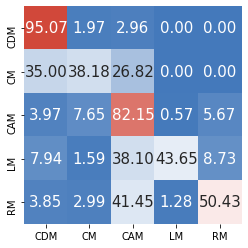

In [95]:
#running the test with the new sample and the modified RF model 
newModelList = [RandomForestClassifier(n_estimators = 200,max_features = 'sqrt', max_leaf_nodes = 10)]
for model in newModelList:
    model.fit(x_fit_train, y_fit_train)
    y_train_fit_pred = Apply_model(model, x_fit_test, y_fit_test)
    plt.figure()
    Confuse(y_fit_test, y_train_fit_pred, ['CDM','CM','CAM','LM', 'RM' ])

In [ ]:
for model in modelList:
    y_test_fit_pred = Apply_model(model, x_fit_test, y_fit_test)
    print(x_fit_test.shape)
    plt.figure()
    Confuse(y_fit_test, y_test_fit_pred, classes)

In [ ]:
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(rf_reg_model)
RF_fitted_Model_new = feature.fit_transform(x_train, y_train)
print(RF_fitted_Model_new)